### **Importing necessary python libraries**

In [828]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the data set**

In [829]:
# Making data frame from insurance.csv data set
insurance_dataframe=pd.read_csv('Data Set\insurance.csv')

In [830]:
#Overview on dataset
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [831]:
#printing 1st five rows of dataset
insurance_dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [832]:
#printing last five rows of dataset
insurance_dataframe.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [833]:
#printing the shape of dataset
insurance_dataframe.shape

(1338, 7)

In [834]:
#printing the info about dataset
insurance_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [835]:
#description about the dataset
insurance_dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [836]:
# To check if any null values exist
insurance_dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<div> So there are no missing  values in any of the row of the the dataset</div>

### Encoding the categorial values

*Label Encoding* :- Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project. In the given dataset columns like sex,region,smoke are not numerical values. So they needed to be encoded into numeric values with label encoder. Here we use normal "Label encoder" instead of "one hot encoder".

In [837]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

# encoding feature "sex" into numeric values
label_encoder.fit(insurance_dataframe.sex.drop_duplicates())
insurance_dataframe.sex=label_encoder.transform(insurance_dataframe.sex)

# encoding feature "smoker" into numeric values
label_encoder.fit(insurance_dataframe.smoker.drop_duplicates())
insurance_dataframe.smoker=label_encoder.transform(insurance_dataframe.smoker)

# encoding feature "region" into numeric values
label_encoder.fit(insurance_dataframe.region.drop_duplicates())
insurance_dataframe.region=label_encoder.transform(insurance_dataframe.region)

In [838]:
#printing the new encoded dataset
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# EXPLORATORY DATA ANALYSIS

### Correlation

correlation :-Correlation analysis is a statistical technique for determining the strength of a link between two variables. It is used to detect patterns and trends in data and to forecast future occurrences.


  <blockquote>
  <ol>

  <li>
  
  Positive Correlation: Positive correlation indicates that two variables have a direct relationship. As one variable increases, the other variable also increases. For example, there is a positive correlation between height and weight. As people get taller, they also tend to weigh more.

  </li>


  <li>
  
  Negative Correlation: Negative correlation indicates that two variables have an inverse relationship. As one variable increases, the other variable decreases. For example, there is a negative correlation between price and demand. As the price of a product increases, the demand for that product decreases.

  </li>

  
  <li>
  
  Zero Correlation: Zero correlation indicates that there is no relationship between two variables. The changes in one variable do not affect the other variable. For example, there is zero correlation between shoe size and intelligence.
  
  </li>
  </ol>
  
  </blockquote>

In [839]:
#printing correlation of all features of the dataset
insurance_dataframe.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [840]:
# we need correlation with "charges" feature 
insurance_dataframe.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

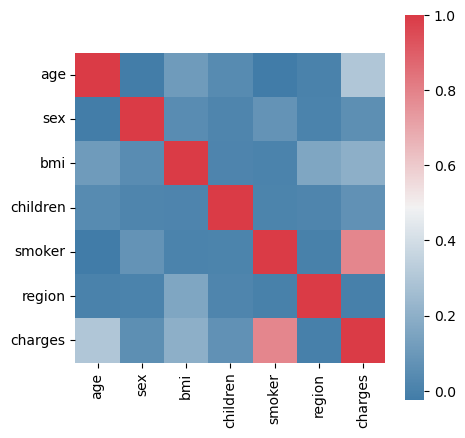

In [841]:
# printing the heat map which shows the total correlation in a graphical form
f,ax=plt.subplots(figsize=(5,5))
correlation=insurance_dataframe.corr()
sns.heatmap(correlation,mask=np.zeros_like(correlation),cmap=sns.diverging_palette(240,10,as_cmap=True),square=True,ax=ax)

Here based upon heatmap we can say there is a very high corelation between "charges"(target variable) and feature "smoker". Also features like age,bmi,children,sex shown positive correlation with "charges" in decreasing order.

### **Now let us see the distribution of various features**

#### **Distribution of Charges** 

Text(0.5, 1.0, 'Distribution of Charges')

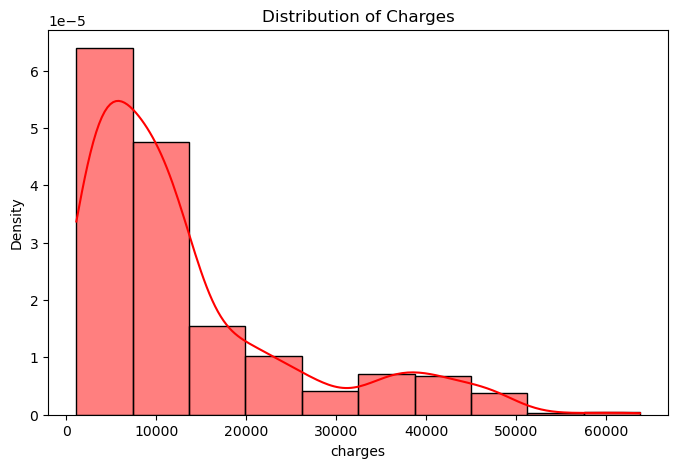

In [842]:

# Plot the distribution of charges
f=plt.figure(figsize=(8,5))
sns.histplot(insurance_dataframe["charges"],stat='density',color='r',kde=True,bins=10)
plt.title('Distribution of Charges')


#### **Distribution of charges for smokers and non-smokers**

Text(0.5, 1.0, 'Distribution of Charges for Non-Smokers')

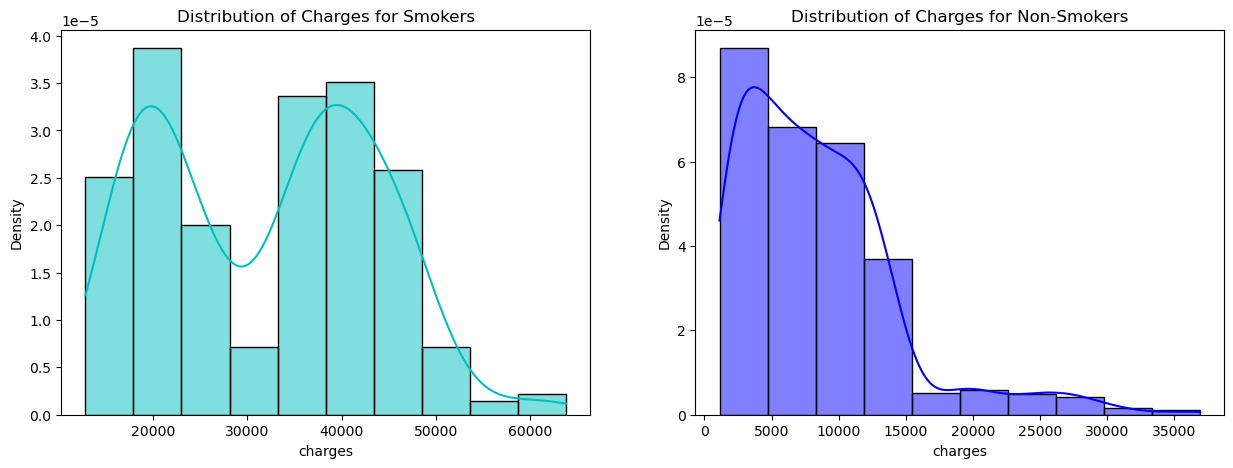

In [843]:
f=plt.figure(figsize=(15,5))# making a plot for figure with chosen width and height
ax=f.add_subplot(121) # or we can write it as add_subplot(1,2,1) and gives the axis
# refer to matlab subplot page to know about subplot(m,n,p)
sns.histplot(insurance_dataframe[(insurance_dataframe.smoker==1)]["charges"],kde=True,color='c',stat='density',bins=10,ax=ax)

# kde is kernal density estimate is the curve in the figure which gives a smooth distribution .
# stat=density which normalize such that the total area of the histogram equals 1
# bins will control the number of rectangular hist displayed
# ax refers to axis
# hue refers to Semantic variable that is mapped to determine the color of plot elements.

ax.set_title("Distribution of Charges for Smokers") #set the title to axes

ax=f.add_subplot(122)
sns.histplot(insurance_dataframe[(insurance_dataframe.smoker==0)]["charges"],kde=True,color='b',stat='density',bins=10,ax=ax)
ax.set_title("Distribution of Charges for Non-Smokers")


#### Hence smoking patients pay more on treatment than non-smokers. Let us check number of smokers and non smokers 

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


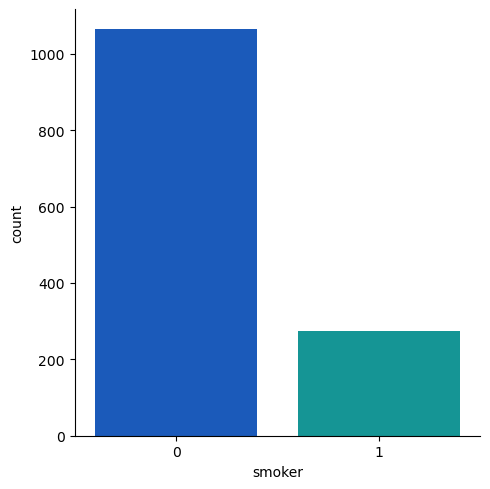

In [844]:
sns.catplot(x="smoker",data=insurance_dataframe,kind="count",palette="winter") 

#### here obviously non smokers are more than smokers

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


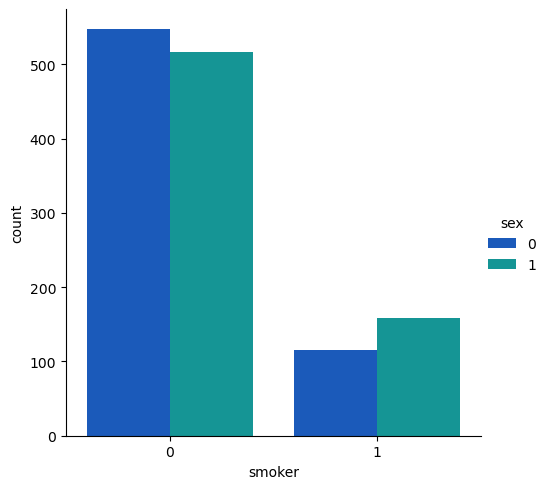

In [845]:
#sea born has catplot which helps to print different types of plot
# sns.catplot(x="smoker",data=insurance_dataframe,kind="count") this will print count of smokers and non smokers
sns.catplot(x="smoker",data=insurance_dataframe,kind="count",hue="sex",palette="winter") 

##### Here female are encoded with 0(blue ) and males are encoded with 1 (green). And these are the following conclusions :
##### Among non smokers females are more in number and among smokers male are more in number

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


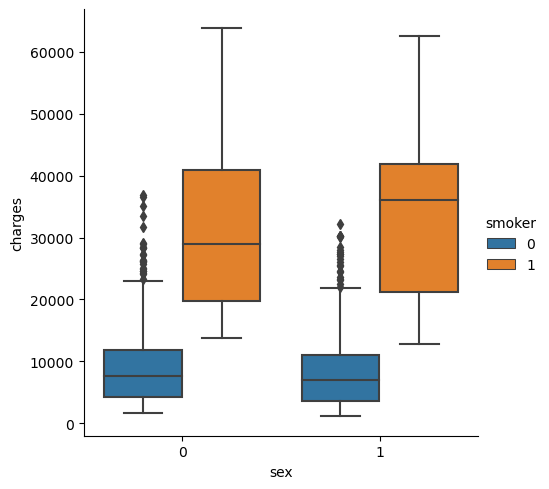

In [846]:
#box plot are one of the type of plot which give lot of details about outliers,median and skewness
sns.catplot(x="sex",y="charges",data=insurance_dataframe,kind="box",hue="smoker")

##### if the median(centeral line box) is near to lower quartile of box it is positively skewed otherwise negatively skewed

Text(0.5, 1.0, 'distribution of charges among smokers in both genders')

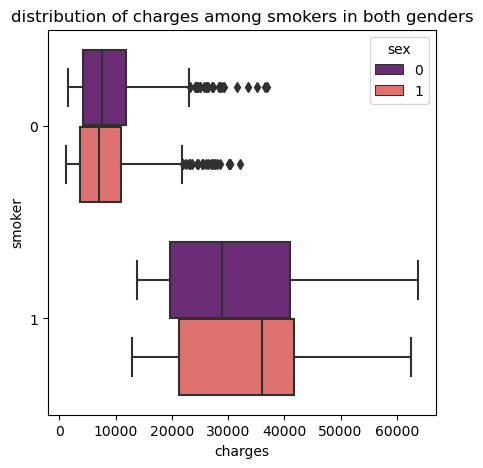

In [847]:
plt.figure(figsize=(5,5))
sns.boxplot(x="charges",y="smoker",data=insurance_dataframe,orient="h",hue="sex",palette="magma")
plt.title("distribution of charges among smokers in both genders")

#### Now we will look at age  distribution

<Axes: xlabel='age', ylabel='Count'>

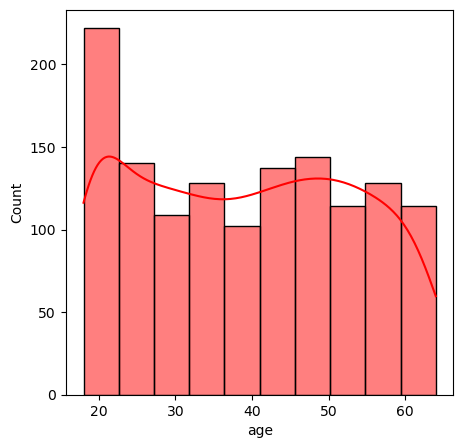

In [848]:
plt.figure(figsize=(5,5))
sns.histplot(x="age",data=insurance_dataframe,kde=True,color='r',bins=10)

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distributon of smokers who are of age 18')

<Figure size 500x500 with 0 Axes>

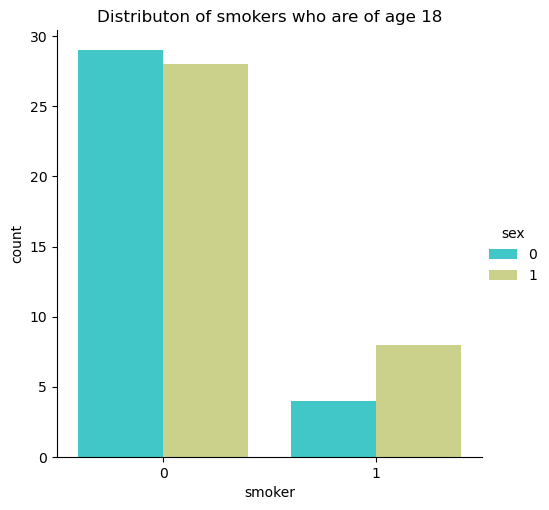

In [849]:
plt.figure(figsize=(5,5))
sns.catplot(x="smoker",data=insurance_dataframe[(insurance_dataframe.age==18)],kind="count",hue="sex",palette="rainbow")
plt.title("Distributon of smokers who are of age 18")

### Does smoking at 18 affects their charges for isurance ? lets find out

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, ' Charges for smokers whose age is 18')

<Figure size 500x500 with 0 Axes>

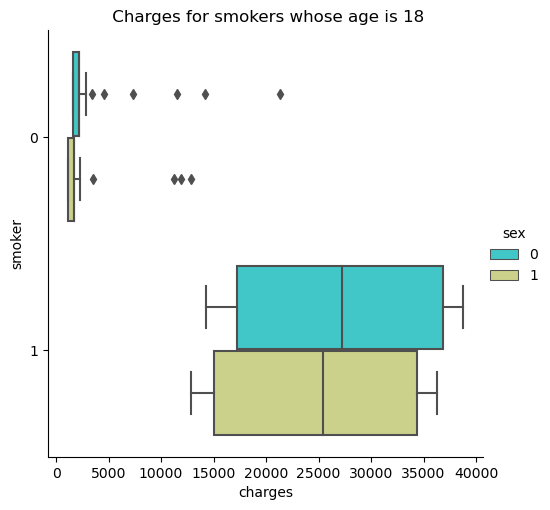

In [850]:
plt.figure(figsize=(5,5))
sns.catplot(x="charges",y="smoker",data=insurance_dataframe[(insurance_dataframe.age)==18],kind="box",hue="sex",orient="h",palette="rainbow")
plt.title(" Charges for smokers whose age is 18")

#### Hence female smokers who are 18, spend more charges than male who are 18

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Smokers and non-smokers')

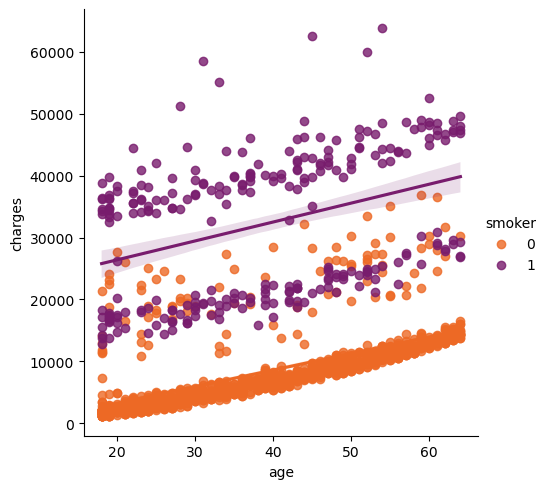

In [851]:
sns.lmplot(x="age", y="charges", hue="smoker", data=insurance_dataframe, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

### Now let us analyze based on bmi

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


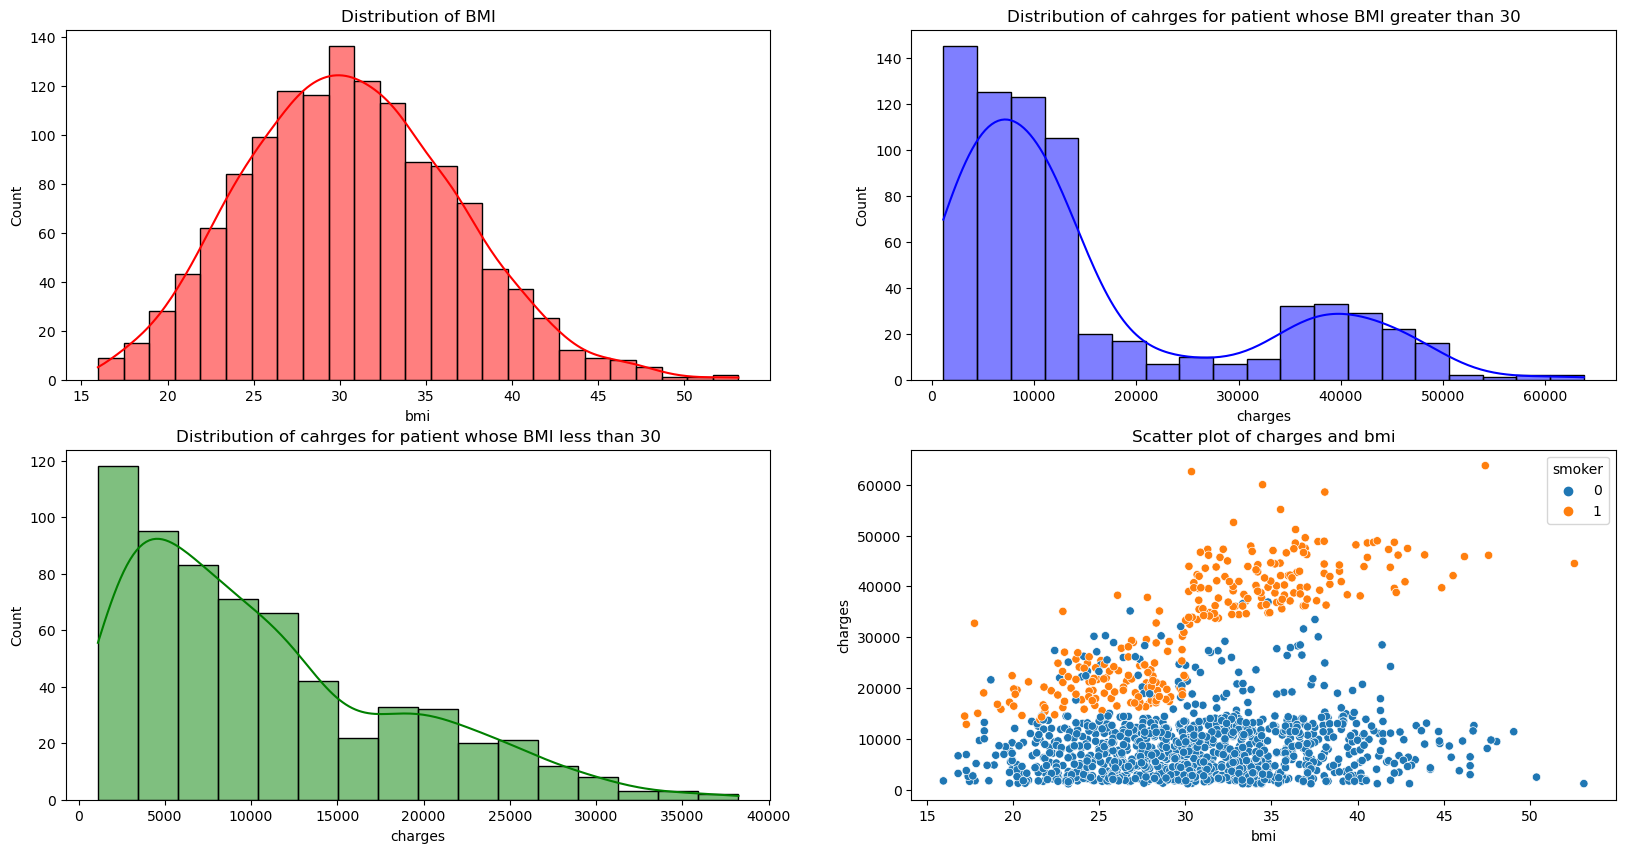

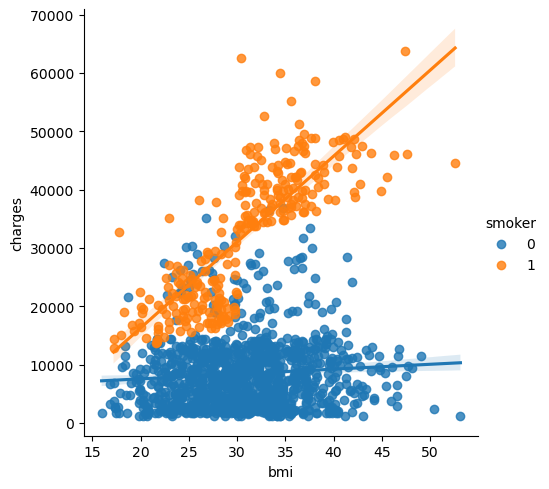

In [852]:
f=plt.figure(figsize=(20,10))
ax=f.add_subplot(221)
sns.histplot(insurance_dataframe["bmi"],stat="count",kde=True,ax=ax,color='r')
ax.set_title("Distribution of BMI")

ax=f.add_subplot(222)
sns.histplot(insurance_dataframe[(insurance_dataframe.bmi)>=30]["charges"],stat="count",kde=True,ax=ax,color='b')
ax.set_title("Distribution of cahrges for patient whose BMI greater than 30")

ax=f.add_subplot(223)
sns.histplot(insurance_dataframe[(insurance_dataframe.bmi)<30]["charges"],stat="count",kde=True,ax=ax,color='g')
ax.set_title("Distribution of cahrges for patient whose BMI less than 30")

ax=f.add_subplot(224)
sns.scatterplot(x="bmi",y="charges",data=insurance_dataframe,hue="smoker",ax=ax)
ax.set_title("Scatter plot of charges and bmi")

sns.lmplot(x="bmi",y="charges",data=insurance_dataframe,hue="smoker")


### Now let us analyze based on children

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of children')

<Figure size 200x200 with 0 Axes>

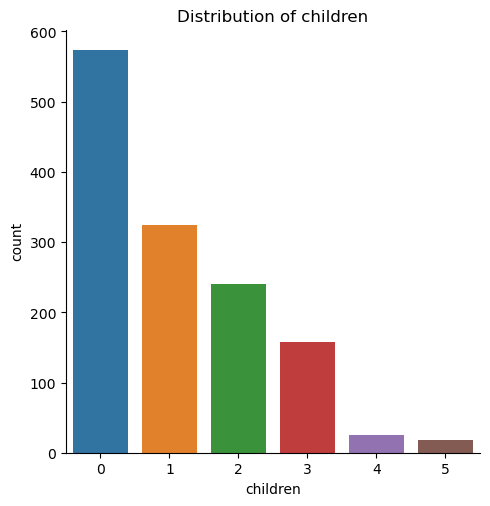

In [853]:
plt.figure(figsize=(2,2))
sns.catplot(x="children",kind="count",data=insurance_dataframe)
plt.title("Distribution of children")

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of smokers who have children')

<Figure size 200x200 with 0 Axes>

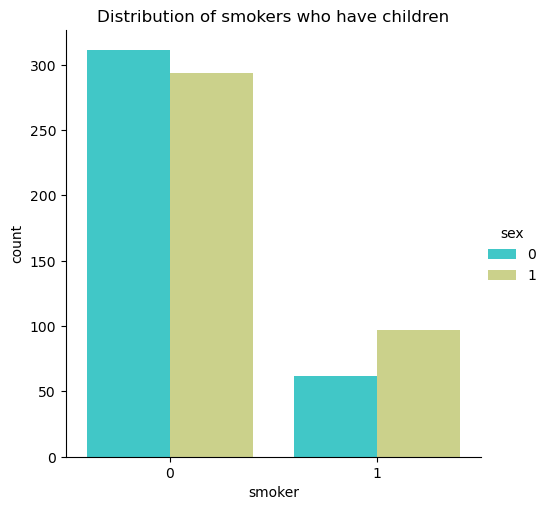

In [854]:
plt.figure(figsize=(2,2))
sns.catplot(x="smoker",kind="count",data=insurance_dataframe[(insurance_dataframe).children>0],hue="sex",palette="rainbow")
plt.title("Distribution of smokers who have children")

#### Here non smoking parents much more than smoking parents.But there are some parents who smoke

# **Training Model**

### **Linear Regression Model**

In [855]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [856]:
x=insurance_dataframe.drop(['charges'],axis=1)
y=insurance_dataframe.charges
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [857]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [858]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [859]:
x_train

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,3
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1168,32,1,35.200,2,0,3
1192,58,0,32.395,1,0,0
...,...,...,...,...,...,...
763,27,1,26.030,0,0,0
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,1


In [860]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [861]:
x_test

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1
...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1
726,41,1,28.405,1,0,1
1132,57,1,40.280,0,0,0
725,30,0,39.050,3,1,2


In [862]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

#### **Metrics**

In [863]:
lr=LinearRegression().fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)
print("Accuracy of model for training data : ",lr.score(x_train,y_train))
print("Accuracy of model for testing  data : ",lr.score(x_test,y_test))

Accuracy of model for training data :  0.7368306228430945
Accuracy of model for testing  data :  0.7998747145449959


#### **Exporting Model in Pickel file**

In [864]:
import pickle
pickle_out=open("linear_regression.pkl","wb")
pickle.dump(lr,pickle_out)
pickle_out.close()

In [865]:
# Making data frame from insurance_edited.csv data set
insurance_edited=pd.read_csv('Data Set\insurance _edited.csv')

In [866]:
#Overview on new dataset 
insurance_edited

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1354,26,female,23.340,2.0,no,southeast,3452.97680
1355,18,male,28.430,NaN,no,southeast,2147.46970
1356,59,male,26.400,NaN,no,southeast,11643.29900
1357,42,female,38.195,1.0,no,NaN,7223.64305


In [867]:
#printing 1st five rows of dataset
insurance_edited.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [868]:
#printing last five rows of dataset
insurance_edited.tail()

,age,sex,bmi,children,smoker,region,charges
1354,26,female,23.340,2.0,no,southeast,3452.97680
1355,18,male,28.430,NaN,no,southeast,2147.46970
1356,59,male,26.400,NaN,no,southeast,11643.29900
1357,42,female,38.195,1.0,no,NaN,7223.64305
1358,49,female,NaN,0.0,no,southeast,20221.28670


In [869]:
#printing the shape of dataset
insurance_edited.shape

(1359, 7)

In [870]:
#description about the dataset
insurance_edited.describe()

,age,bmi,children,charges
count,1359.00000,1348.000000,1351.000000,1359.000000
mean,39.18543,30.681643,1.095485,13277.014853
std,14.03586,6.112185,1.202677,12094.087503
min,18.00000,15.960000,0.000000,1121.873900
25%,26.50000,26.315000,0.000000,4729.002375
50%,39.00000,30.400000,1.000000,9391.346000
75%,51.00000,34.770000,2.000000,16840.667970
max,64.00000,53.130000,5.000000,63770.428010


In [871]:
#printing the info about dataset
insurance_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1359 non-null   int64  
 1   sex       1359 non-null   object 
 2   bmi       1348 non-null   float64
 3   children  1351 non-null   float64
 4   smoker    1359 non-null   object 
 5   region    1352 non-null   object 
 6   charges   1359 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 74.4+ KB


In [872]:
# To check if any null values exist
insurance_edited.isnull().sum()

age          0
sex          0
bmi         11
children     8
smoker       0
region       7
charges      0
dtype: int64

so we can see here certain columns like bmi,children,region have some missing values . so we need to apply some appropriate preprocessing for missing values

### we use statistical methods like mean,mode,median to fill the missing values
-  Bmi (float) : we use median to fill the missing values in bmi column. Median is chosen instead of mean because median is more robust to outliers . And mode is used while representing categorical values .

-  children (integer) : For the children column, which is discrete and skewed, the median would provide a central value that is less influenced by the skewness of the data. Since this column has a limited range of integer values, the median would represent a typical value without being affected by the distribution's shape.

-  region(classification) : For region column mode is chosen because for categorical data, the mode is the most appropriate measure since it represents the most common category.

In [873]:
# Missing value imputation process

#bmi using median
insurance_edited['bmi'].fillna(insurance_edited['bmi'].median(), inplace=True)

#children using median
insurance_edited['children'].fillna(insurance_edited['children'].median(), inplace=True)

#region using mode
insurance_edited['region'].fillna(insurance_edited['region'].mode()[0], inplace=True)



In [874]:
#reverifying the missing values after data imputation
insurance_edited.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Encoding the categorial values

In [875]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

# encoding feature "sex" into numeric values
label_encoder.fit(insurance_edited.sex.drop_duplicates())
insurance_edited.sex=label_encoder.transform(insurance_edited.sex)

# encoding feature "smoker" into numeric values
label_encoder.fit(insurance_edited.smoker.drop_duplicates())
insurance_edited.smoker=label_encoder.transform(insurance_edited.smoker)

# encoding feature "region" into numeric values
label_encoder.fit(insurance_edited.region.drop_duplicates())
insurance_edited.region=label_encoder.transform(insurance_edited.region)

In [876]:
insurance_edited

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1354,26,0,23.340,2.0,0,2,3452.97680
1355,18,1,28.430,1.0,0,2,2147.46970
1356,59,1,26.400,1.0,0,2,11643.29900
1357,42,0,38.195,1.0,0,2,7223.64305


# **Training New Model from edited dataset**

In [877]:
x_edit=insurance_edited.drop(['charges'],axis=1)
y_edit=insurance_edited.charges
x_edit

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0.0,1,3
1,18,1,33.770,1.0,0,2
2,28,1,33.000,3.0,0,2
3,33,1,22.705,0.0,0,1
4,32,1,28.880,0.0,0,1
...,...,...,...,...,...,...
1354,26,0,23.340,2.0,0,2
1355,18,1,28.430,1.0,0,2
1356,59,1,26.400,1.0,0,2
1357,42,0,38.195,1.0,0,2


In [878]:
y_edit

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1354     3452.97680
1355     2147.46970
1356    11643.29900
1357     7223.64305
1358    20221.28670
Name: charges, Length: 1359, dtype: float64

In [879]:
x_edit_train,x_edit_test,y_edit_train,y_edit_test=train_test_split(x_edit,y_edit,test_size=0.2,random_state=0)

In [880]:
x_edit_train

,age,sex,bmi,children,smoker,region
983,27,0,30.590,1.0,0,0
884,25,1,26.695,4.0,0,1
1126,55,1,29.900,0.0,0,3
990,26,0,19.800,1.0,0,3
695,26,0,40.185,0.0,0,1
...,...,...,...,...,...,...
763,27,1,26.030,0.0,0,0
835,42,1,35.970,2.0,0,2
1216,40,1,25.080,0.0,0,2
559,19,1,35.530,0.0,0,1


In [881]:
y_edit_train

983     16796.41194
884      4877.98105
1126    10214.63600
990      3378.91000
695      3201.24515
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1087, dtype: float64

In [882]:
x_edit_test

,age,sex,bmi,children,smoker,region
965,35,1,27.100,1.0,0,3
657,27,1,33.155,2.0,0,1
1002,24,1,25.800,0.0,0,3
918,61,0,28.200,0.0,0,3
798,58,0,33.100,0.0,0,3
...,...,...,...,...,...,...
652,48,0,31.130,0.0,0,2
251,63,0,32.200,2.0,1,3
592,20,1,31.130,2.0,0,2
667,40,0,32.775,2.0,1,1


In [883]:
y_edit_test

965      4746.34400
657      4058.71245
1002     1972.95000
918     13041.92100
798     11848.14100
           ...     
652      8280.62270
251     47305.30500
592      2566.47070
667     40003.33225
1084    15019.76005
Name: charges, Length: 272, dtype: float64

#### **Metrics**

In [884]:
lr_edit=LinearRegression().fit(x_edit_train,y_edit_train)
y_edit_train_pred=lr.predict(x_edit_train)
y_test_edit_pred=lr.predict(x_test)
print("Accuracy of model for training data : ",lr_edit.score(x_edit_train,y_edit_train))
print("Accuracy of model for testing  data : ",lr_edit.score(x_edit_test,y_edit_test))

Accuracy of model for training data :  0.7351493915417071
Accuracy of model for testing  data :  0.792071895849732


In [885]:
pickle_out=open("linear_regression_case_2.pkl","wb")
pickle.dump(lr_edit,pickle_out)
pickle_out.close()

## **Polynomial Regression Model**

In [886]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [887]:
#standardization using standard scaler .
#This helps us achieve a normal distribution(if it is already normal but skewed) 
# of the data with a mean equal to zero and a standard deviation equal to 1.
scaler=StandardScaler()
insurance_edited[['age','bmi']]=scaler.fit_transform(insurance_edited[['age','bmi']])
insurance_edited

,age,sex,bmi,children,smoker,region,charges
0,-1.438662,0,-0.456742,0.0,1,3,16884.92400
1,-1.509935,1,0.507895,1.0,0,2,1725.55230
2,-0.797211,1,0.381358,3.0,0,2,4449.46200
3,-0.440850,1,-1.310454,0.0,0,1,21984.47061
4,-0.512122,1,-0.295695,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1354,-0.939756,0,-1.206102,2.0,0,2,3452.97680
1355,-1.509935,1,-0.369645,1.0,0,2,2147.46970
1356,1.412230,1,-0.703242,1.0,0,2,11643.29900
1357,0.200601,0,1.235070,1.0,0,2,7223.64305


In [904]:
poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features=poly.fit_transform(insurance_edited[['age','bmi']])
poly_feature_names=poly.get_feature_names_out(['age', 'bmi'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
x_poly = pd.concat([insurance_edited.drop(columns=['age', 'bmi','charges']), poly_df], axis=1)
y_poly=insurance_edited['charges']
x_poly

,sex,children,smoker,region,age,bmi,age^2,age bmi,bmi^2
0,0,0.0,1,3,-1.438662,-0.456742,2.069749,0.657098,0.208613
1,1,1.0,0,2,-1.509935,0.507895,2.279902,-0.766888,0.257957
2,1,3.0,0,2,-0.797211,0.381358,0.635546,-0.304023,0.145434
3,1,0.0,0,1,-0.440850,-1.310454,0.194349,0.577713,1.717289
4,1,0.0,0,1,-0.512122,-0.295695,0.262269,0.151432,0.087436
...,...,...,...,...,...,...,...,...,...
1354,0,2.0,0,2,-0.939756,-1.206102,0.883141,1.133442,1.454682
1355,1,1.0,0,2,-1.509935,-0.369645,2.279902,0.558140,0.136638
1356,1,1.0,0,2,1.412230,-0.703242,1.994394,-0.993140,0.494549
1357,0,1.0,0,2,0.200601,1.235070,0.040241,0.247756,1.525397


In [905]:
x_poly_train,x_poly_test,y_poly_train,y_poly_test=train_test_split(x_poly,y_poly,test_size=0.2,random_state=0)

#### **Metrics**

In [906]:
poly_model=LinearRegression().fit(x_poly_train,y_poly_train)
print("Accuracy of model for training data : ",poly_model.score(x_poly_train,y_poly_train))
print("Accuracy of model for testing  data : ",poly_model.score(x_poly_test,y_poly_test))

Accuracy of model for training data :  0.7396028574212702
Accuracy of model for testing  data :  0.7930076151017389


In [912]:
z=np.array([[0,0.0,1,3,-1.438662,-0.456742 ,2.069749,0.657098,0.208613]])
poly_model.predict(z)

c:\Users\Bhavesh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25807.20056091])

In [907]:
pickle_out=open("polynomial_regression.pkl","wb")
pickle.dump(poly_model,pickle_out)
pickle_out.close()

# **Family Floater**

Now we add a new column "parents "into the original dataset. This will help us to implement family floater model.This column 
will denote no.of parents a person has and the column  is populated  with [0,1,2] randomnly and  inversly proportional to age of the person.
Assuming that the higher the age of person less likely both the parents are alive

In [892]:
# Define the function to assign number of parents inversely proportional to age
def assign_parents(age):
    # Probabilities decrease with increasing age
    if age < 30:
        return np.random.choice([0, 1, 2], p=[0.1, 0.2, 0.7])
    elif 30 <= age < 50:
        return np.random.choice([0, 1, 2], p=[0.3, 0.4, 0.3])
    elif 50 <= age < 60:
        return np.random.choice([0, 1, 2], p=[0.5, 0.4, 0.1])
    else:
        return np.random.choice([0, 1, 2], p=[0.7, 0.2, 0.1])

In [893]:
#creating new data frame for family floater from existing data frame
insurance_dataframe_family=insurance_dataframe.copy(deep=True)
# Apply the function to create the 'parents' column
insurance_dataframe_family['parents'] = insurance_dataframe_family['age'].apply(assign_parents)

In [894]:
#printing the new insurance dataframe 
insurance_dataframe_family

,age,sex,bmi,children,smoker,region,charges,parents
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,2
2,28,1,33.000,3,0,2,4449.46200,2
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,2
1334,18,0,31.920,0,0,0,2205.98080,2
1335,18,0,36.850,0,0,2,1629.83350,2
1336,21,0,25.800,0,0,3,2007.94500,2


In [895]:
x_family=insurance_dataframe_family.drop(['charges'],axis=1)
y_family=insurance_dataframe_family.charges
x_family

,age,sex,bmi,children,smoker,region,parents
0,19,0,27.900,0,1,3,2
1,18,1,33.770,1,0,2,2
2,28,1,33.000,3,0,2,2
3,33,1,22.705,0,0,1,0
4,32,1,28.880,0,0,1,2
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,2
1334,18,0,31.920,0,0,0,2
1335,18,0,36.850,0,0,2,2
1336,21,0,25.800,0,0,3,2


In [896]:
y_family

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [897]:
x_family_train,x_family_test,y_family_train,y_family_test=train_test_split(x_family,y_family,test_size=0.2,random_state=0)

In [898]:
x_family_train

,age,sex,bmi,children,smoker,region,parents
621,37,1,34.100,4,1,3,1
194,18,1,34.430,0,0,2,2
240,23,0,36.670,2,1,0,2
1168,32,1,35.200,2,0,3,0
1192,58,0,32.395,1,0,0,0
...,...,...,...,...,...,...,...
763,27,1,26.030,0,0,0,2
835,42,1,35.970,2,0,2,1
1216,40,1,25.080,0,0,2,1
559,19,1,35.530,0,0,1,1


In [899]:
y_family_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [900]:
x_family_test

,age,sex,bmi,children,smoker,region,parents
578,52,1,30.200,1,0,3,0
610,47,0,29.370,1,0,2,2
569,48,1,40.565,2,1,1,1
1034,61,1,38.380,0,0,1,2
198,51,0,18.050,0,0,1,1
...,...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1,1
726,41,1,28.405,1,0,1,2
1132,57,1,40.280,0,0,0,1
725,30,0,39.050,3,1,2,0


In [901]:
y_family_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

#### **Metrics**

In [902]:
lr_family=LinearRegression().fit(x_family_train,y_family_train)
y_family_train_pred=lr_family.predict(x_family_train)
y_family_test_pred=lr_family.predict(x_family_test)
print("Accuracy of model for training data : ",lr_family.score(x_family_train,y_family_train))
print("Accuracy of model for testing  data : ",lr_family.score(x_family_test,y_family_test))

Accuracy of model for training data :  0.7368340219465299
Accuracy of model for testing  data :  0.7999307939921853


In [903]:
import pickle
pickle_out=open("family_floater.pkl","wb")
pickle.dump(lr_family,pickle_out)
pickle_out.close()